In [1]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk    

In [2]:
##reading dataset
df = pd.read_csv("C:\\Users\PRACHI MAHAJAN\\Documents\\1.Amazon Use-case\\Reviews.csv")

print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Data Preparation

In [4]:
### add some columns for upvote metrics
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


#### assigning different different labels to helpful% according to its value

In [6]:
df['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [7]:
pd.cut(df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: Helpful %, Length: 568454, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [8]:
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [10]:
df.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful %  
Score %upvote                                                              
1     Empty                      8060    8060     8060    8060       8060  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     Empty                      4234    4234     4234    4234       4234  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     Empty                      5062    5062     5062    5062       5062  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

#### considering only Id Column, as I have to count Total Upvotes for different different categories

In [11]:
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [12]:
df_s=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


#### create Pivot Table for better conclusion

In [13]:
df_s.pivot(index='%upvote',columns='Score')

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

#### create heatmap of it,for better Visualisations

Text(0.5, 1.0, 'How helpful users find among user scores')

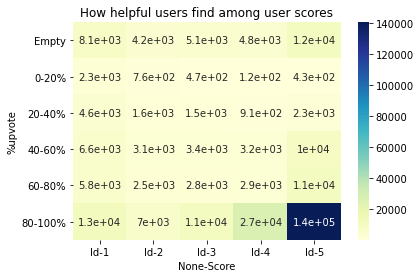

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'YlGnBu')
plt.title('How helpful users find among user scores')

In [15]:
df.shape

(568454, 12)

In [16]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [17]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [18]:
df2 = df[df['Score'] != 3]
X = df2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

#### Score prediction

### convert your text into vectors using NLP

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

In [20]:
##takes almost 2 mins to execute
X_c = c.fit_transform(X)

In [21]:
print('features: {}'.format(X_c.shape[1]))

features: 114969


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 394360


In [23]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [24]:
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.9361829993762076


#### fetch Top 20 Positive & Top 20 negative words

In [25]:
w = c.get_feature_names()
w

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [26]:
coef = ml.coef_.tolist()[0]
coef

[-0.24770010227928474,
 0.24521009096076854,
 0.3804076943764987,
 -0.012247856801644147,
 0.0020223029845511096,
 -0.01613494524025968,
 0.0003635383913931604,
 -0.016328244898666154,
 0.0004230756612301254,
 0.0003156110788550998,
 0.001338000457778045,
 -0.0115801877668899,
 0.0,
 0.013294586333339721,
 -0.1917139830165064,
 0.008318346239222486,
 0.002177841262436234,
 0.0026953516102141014,
 0.0,
 6.4310313274471e-05,
 0.11767092455357472,
 0.018817723477241075,
 0.04449443308527911,
 0.04449443308527911,
 0.04449443308527911,
 0.04449443308527911,
 0.04449443308527911,
 0.04449443308527911,
 0.04449443308527911,
 0.04449443308527911,
 0.04449443308527911,
 -0.00040408276605253266,
 0.05334203048780587,
 0.0,
 -0.09929715631436474,
 -0.0005722726459117824,
 0.00016614918461118876,
 0.0,
 0.0,
 2.4951933059133008e-05,
 -0.11214634086951182,
 0.0,
 0.00010551161027192325,
 0.006458522172210067,
 0.0,
 0.0,
 0.01516214281192674,
 8.401734274226422e-05,
 0.0,
 -0.0029790724635885275,


In [27]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df

,Word,Coefficient
0,00,-0.247700
1,000,0.245210
2,0000,0.380408
3,000001,-0.012248
4,00001,0.002022
...,...,...
114964,çaykur,0.000852
114965,çelem,0.000000
114966,être,0.000000
114967,île,0.000000


In [28]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_df

,Word,Coefficient
80600,pleasantly,3.852506
94667,skeptical,3.363542
39072,downside,3.334388
5865,addicting,2.990169
39214,drawback,2.849340
...,...,...
37560,disappointing,-3.225043
106852,unacceptable,-3.528047
88351,returnable,-3.629853
34989,deceptive,-3.925733


In [29]:
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('\n')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))

-Top 20 positive-
         Word  Coefficient
   pleasantly     3.852506
    skeptical     3.363542
     downside     3.334388
    addicting     2.990169
     drawback     2.849340
       resist     2.681809
      worries     2.670673
       delish     2.616087
   economical     2.562757
      easiest     2.521638
       hooked     2.409432
        saves     2.314861
     terrific     2.282903
     soothing     2.240854
     tastiest     2.228510
       prompt     2.195975
    lifesaver     2.168230
    excellent     2.133151
deliciousness     2.129573
    delicious     2.117644


-Top 20 negative-
          Word  Coefficient
    overpowers    -2.556430
       defeats    -2.570804
       vomited    -2.655202
    unfinished    -2.658899
         lousy    -2.684008
           ick    -2.686252
   unappealing    -2.715059
disappointment    -2.743954
      mediocre    -2.806062
   embarrassed    -2.951323
        lacked    -3.000301
        ripoff    -3.014252
   disapointed    -3.037602
   

#### lets try to create a function so that I can apply mutliple NLP Techniques + Multiple Ml algos in such a way that I will acheive my best accuracy

In [30]:
### create a function 

def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression

In [32]:

text_fit(X, y, c, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9353233830845771


-Top 20 positive-
      Word  Coefficient
pleasantly     4.509872
  downside     3.546801
 addicting     3.306915
 skeptical     3.273611
    hooked     3.052044
  hesitant     2.819099
  soothing     2.562739
    delish     2.422252
  terrific     2.385198
 delighted     2.356720
      whim     2.325673
    brings     2.293681
    solved     2.239620
     penny     2.228328
    resist     2.213188
    intend     2.193599
   worries     2.186058
  relaxing     2.165714
   worried     2.154636
  drawback     2.129451


-Top 20 negative-
         Word  Coefficient
  embarrassed    -2.338512
          ick    -2.340846
      defeats    -2.398115
       ruined    -2.472668
        ruins    -2.518709
   unbearable    -2.541713
       bummer    -2.565390
       lacked    -2.580899
disappointing    -2.633993
  disapointed    -2.673263
        lousy    -2.675829
     mediocre    -2.766097
 unaccep

### Lets define a predict function

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [35]:

predict(X,y,c,lr)

features: 114969
 train records: 394360
 test records: 131454
[[ 15020   2776]
 [  5473 108185]]
0.9372480107109712


#### Accuracy is around 93.9% - not bad. However we notice that some of those significant coefficients are not meaningful, e.g. 280mg.

In [36]:
from sklearn.dummy import DummyClassifier

In [37]:
### calling function for dummy classifier 
text_fit(X, y, c, DummyClassifier(),0)

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.844340986200496


#### Logistic regression model on TFIDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9346995907313584


-Top 20 positive-
      Word  Coefficient
     great    13.687657
 delicious    11.849136
      best    11.705175
   perfect    10.734894
 excellent     9.657568
     loves     9.599046
    highly     8.711161
      love     8.503470
   amazing     8.120612
 wonderful     8.004408
   awesome     7.498946
      good     7.449814
pleasantly     7.352793
    smooth     7.244883
    hooked     7.158291
   pleased     7.147851
  favorite     7.111297
      nice     7.019779
     yummy     6.916658
      glad     6.617709


-Top 20 negative-
          Word  Coefficient
         gross    -5.767102
         waste    -5.881405
   undrinkable    -5.937635
          yuck    -5.943477
         stale    -5.949615
         worse    -6.245542
    disgusting    -6.251430
         bland    -6.329617
     tasteless    -6.756479
        return    -6.788895
         threw    -6.864894
          weak    -6.86

In [39]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
predict(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
[[ 14182   2286]
 [  6289 108697]]
0.9347680557457362


#### Upvote prediction

    We will be focusing on score 5 reviews, and get rid of comments with neutral votes

In [40]:
data = df[df['Score'] == 5]


In [41]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [42]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(154428, 12)

In [43]:
X = data2['Text']

In [44]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [45]:
print(y.value_counts())

1.0    151721
0.0      2707
Name: %upvote, dtype: int64


#### The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones.
    Let's resample the data to get balanced data:

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tf=TfidfVectorizer()

In [48]:
X_c=tf.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [50]:
y_test.value_counts()

1.0    45524
0.0      805
Name: %upvote, dtype: int64

In [51]:
## RandomOverSampler to handle imbalanced data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [52]:
os =  RandomOverSampler()

In [53]:
X_train_res, y_train_res = os.fit_sample(X_c, y)

In [54]:
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [55]:
from collections import Counter

In [56]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_class=LogisticRegression()

In [59]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [60]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [61]:

clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [62]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  805     0]
 [  789 44735]]
0.9829696302531892
